In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
train_data=pd.read_csv("C:/Users/hp/Downloads/Compressed/train.csv")
test_data=pd.read_csv("C:/Users/hp/Downloads/Compressed/test.csv")

In [4]:
train_data.isnull().sum()
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [5]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
train_data.shape


(42000, 785)

In [9]:
test_data.shape

(28000, 784)

In [10]:
y_train_data=train_data["label"]
x_train_data=train_data.drop("label",axis=1)

In [11]:

x_train,x_val,y_train,y_val=train_test_split(x_train_data,y_train_data,test_size=0.2,random_state=108)

In [12]:
x_train = np.array(x_train).reshape(x_train.shape[0],28,28,1)/255
x_val = np.array(x_val).reshape(x_val.shape[0],28,28,1)/255

In [13]:
y_train=np.array(pd.get_dummies(y_train))
y_val=np.array(pd.get_dummies(y_val))

In [18]:
test_data.shape
test_data = np.array(test_data).reshape(test_data.shape[0],28,28,1)/255
test_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
test_data.shape

(28000, 28, 28, 1)

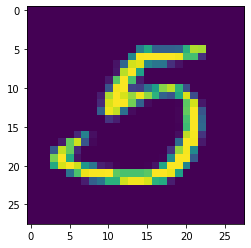

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [22]:
model = keras.Sequential([layers.Conv2D(6,(5,5), activation='relu', input_shape=(28,28,1)),
                          layers.BatchNormalization(),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Conv2D(16, (5,5), activation='relu'),
                          layers.BatchNormalization(),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Flatten(),
                          layers.Dense(128, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(10, activation='softmax')])

In [23]:
model.compile(optimizer = 'adamax', loss='categorical_hinge', metrics=['accuracy'])

In [25]:
fit_model=model.fit(x_train,y_train,validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0384 - accuracy: 0.9845 - val_loss: 0.0389 - val_accuracy: 0.9832
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0369 - accuracy: 0.9851 - val_loss: 0.0384 - val_accuracy: 0.9826
Epoch 3/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0347 - accuracy: 0.9857 - val_loss: 0.0399 - val_accuracy: 0.9820
Epoch 4/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0327 - accuracy: 0.9866 - val_loss: 0.0366 - val_accuracy: 0.9837
Epoch 5/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0316 - accuracy: 0.9873 - val_loss: 0.0369 - val_accuracy: 0.9826
Epoch 6/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0298 - accuracy: 0.9882 - val_loss: 0.0346 - val_accuracy: 0.9845
Epoch 7/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0292 - accuracy: 0.9884 - val_loss: 0.0353 -

In [28]:
y_prd=model.predict(test_data)